__DSC 478__

__Jonathan Lynch__

# Assignment 2 - Part 2: Classification using scikit-learn

## 2-A: Load and process data: transform data into numeric variables, normalize numeric variables (for KNN), split into training and test sets, separate target variable

__import libraries and read in file:__

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import pylab as plt

%cd "/Users/jonathanlynch/Desktop/DSC 478"

bank = pd.read_csv("bank_data.csv", index_col=0)

bank.head() 

/Users/jonathanlynch/Desktop/DSC 478


,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


__Transform data to numeric variables:__

In [2]:
region_num = {"INNER_CITY": 1, "TOWN": 2, "RURAL": 3, "SUBURBAN": 4}
bank = bank.replace(region_num)

gender_num = {"FEMALE": 0, "MALE":1}
bank = bank.replace(gender_num)

bank.replace(to_replace = ['YES', 'NO'], value = [1, 0], inplace=True) 

In [3]:
bank.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,0,1,0,0,0,0,0,1
ID12102,40,30085.1,3,1,2,1,1,0,1,1,0
ID12103,51,16575.4,0,0,1,1,1,1,1,0,0
ID12104,23,20375.4,3,0,2,1,0,0,1,0,0
ID12105,57,50576.3,0,0,3,1,0,1,0,0,0


__Normalize age, income & children using min-max normalization (so all values are between 0 & 1) for KNN classification:__

In [4]:
scaler = MinMaxScaler()
bank[['age', 'income', 'children']] = scaler.fit_transform(bank[['age', 'income', 'children']])

In [5]:
bank.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,0,1,0,0,0,0,0,1
ID12102,0.448980,0.431395,1.000000,1,2,1,1,0,1,1,0
ID12103,0.673469,0.198933,0.000000,0,1,1,1,1,1,0,0
ID12104,0.102041,0.264320,1.000000,0,2,1,0,0,1,0,0
ID12105,0.795918,0.783987,0.000000,0,3,1,0,1,0,0,0


__Split into training and test sets:__

In [6]:
train, test = train_test_split(bank, test_size = 0.2, shuffle = True)

__Separate target variable in both training and test sets:__

In [7]:
training_attributes = ["age","income","children","gender","region","married","car","savings_acct","current_acct","mortgage"]
target = 'pep'

train_set = train[training_attributes]
train_target = train[target]

test_set = test[training_attributes]
test_target = test[target]

## 2-B: Run scikit-learn's KNN classifier on the test set, generate classification report & confusion matrix. Compute the average accuracy score, and experiment with different values of K and the weight parameter to improve accuracy.

__Run KNN classifier without weighted distances (k=5, Euclidean distance measure):__

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
clf = neighbors.KNeighborsClassifier()
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
gs = GridSearchCV(clf, parameters, verbose=1, cv=5)

In [25]:
gs.fit(train_set, train_target)

gs.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


{'n_neighbors': 10}

In [21]:
n_neighbors = 10

knn_classifier = neighbors.KNeighborsClassifier(n_neighbors, metric='euclidean')  # knn classifier w/o weighted distances (all points have equal influence)

knn_classifier.fit(train_set, train_target)  # fit the classifier on training data

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

__Look at the class predictions:__

In [22]:
pred_test_target = knn_classifier.predict(test_set)  # see which classes are predicted by classifier for test set
pred_test_target

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0])

__Look at classification report:__

In [23]:
print(classification_report(test_target, pred_test_target))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        69
           1       0.56      0.53      0.55        51

    accuracy                           0.62       120
   macro avg       0.61      0.61      0.61       120
weighted avg       0.62      0.62      0.62       120



__Generate confusion matrix & visualize results:__

In [135]:
knncm = confusion_matrix(test_target, pred_test_target)
print(knncm)

[[53 17]
 [23 27]]


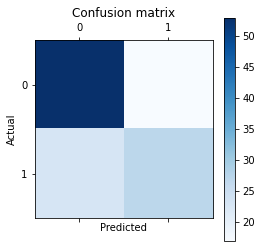

In [136]:
plt.matshow(knncm,  cmap = plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

__Compute average accuracy scores on training and test data:__

In [137]:
train_accuracy = np.round(knn_classifier.score(train_set, train_target)*100,0)  # use score method to get average accuracy for train data
test_accuracy = np.round(knn_classifier.score(test_set, test_target)*100,0)     # use score method to get average accuracy for test data

print('average accuracy train:', train_accuracy)
print('average accuracy test:', test_accuracy)

average accuracy train: 76.0
average accuracy test: 67.0


The average accuracy for this KKN classifier (with k=5, a Euclidean distance measure, & using uniform weights) is 67% (for the test set).  This same classifier was also run with different values of K (k=3, k=7, k=9, k=15, & k=20) to determine the best value of K based on the average accuracy (for the test set). The average accuracy with k=3 was 62% (for the test set), the average accuracy with k=7 was 63% (for the test set), the average accuracy with k=9 was 67% (for the test set), the average accuracy with k=15 was 62% (for the test set), and the average accuracy with k=20 was 67% (for the test set).

__Run KNN classifier with weighted distances (k=5, Euclidean distance measure):__

In [144]:
n_neighbors = 5

knn_classifier = neighbors.KNeighborsClassifier(n_neighbors, metric='euclidean', weights='distance')  # knn classifier w/ weighted distances (closer points have more influence)

knn_classifier.fit(train_set, train_target)  # fit the classifier on training data

KNeighborsClassifier(metric='euclidean', weights='distance')

__Look at the class predictions for KNN with weighted distances:__

In [145]:
pred_test_target = knn_classifier.predict(test_set)  # see which classes are predicted by classifier for test set
pred_test_target

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

__Look at classification report for KNN with weighted distances:__

In [146]:
print(classification_report(test_target, pred_test_target))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        70
           1       0.61      0.56      0.58        50

    accuracy                           0.67       120
   macro avg       0.66      0.65      0.65       120
weighted avg       0.66      0.67      0.66       120



__Generate confusion matrix & visualize results for KNN with weighted distances:__

In [147]:
knncm = confusion_matrix(test_target, pred_test_target)
print(knncm)

[[52 18]
 [22 28]]


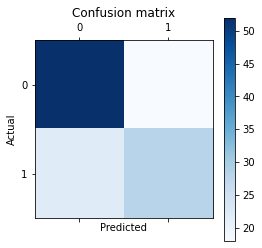

In [148]:
plt.matshow(knncm,  cmap = plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

__Compute average accuracy scores on training and test data for KNN with weighted distances:__

In [149]:
train_accuracy = np.round(knn_classifier.score(train_set, train_target)*100,0)  # use score method to get average accuracy for train data
test_accuracy = np.round(knn_classifier.score(test_set, test_target)*100,0)     # use score method to get average accuracy for test data

print('average accuracy train:', train_accuracy)
print('average accuracy test:', test_accuracy)

average accuracy train: 100.0
average accuracy test: 67.0


Additionally, the same values of K (k=3, k=5, k=7, k=9, k=15, & k=20) were also evaluated on this KNN classifier with distance weighting (giving greater influence to close neighbors than those that are further away).  The average accuracy with distance weighting and k=5 was 67% (on the test set), the average accuracy with distance weighting and k=3 was 62% (on the test set), the average accuracy with distance weighting and k=7 was 66% (on the test set), the average accuracy with distance weighting and k=9 was 66% (on the test set), the average accuracy with distance weighting and k=15 was 65% (on the test set), and the average accuracy with distance weighting for k=20 was 68% (on the test set). 

Overall, it appears that including the parameter for distance weighting in this classifier resulted in either the same or better results across all values of K except for one (k=9).  Based on these experiments and outcomes, I would choose a value of k=20, and include the distance weighting parameter in the classifier to achieve the best result (68% average accuracy for test data).  

## 2-C: Classification using scikit-learn's decision tree classifier and Naive Bayes

__Run decision tree classifier:__

In [155]:
tree_classifier = tree.DecisionTreeClassifier()  # decision tree classifier
tree_classifier = tree_classifier.fit(train_set, train_target)    # fit classifier on training data

__Look at the class predictions:__

In [156]:
pred_test_target = tree_classifier.predict(test_set)  # see which classes are predicted for test set
pred_test_target

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

__Look at decision tree classification report:__

In [157]:
print(classification_report(test_target, pred_test_target))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        70
           1       0.76      0.84      0.80        50

    accuracy                           0.82       120
   macro avg       0.82      0.83      0.82       120
weighted avg       0.83      0.82      0.83       120



__Generate confusion matrix & visualize results for decision tree classifier:__

In [158]:
treecm = confusion_matrix(test_target, pred_test_target)
print(treecm)

[[57 13]
 [ 8 42]]


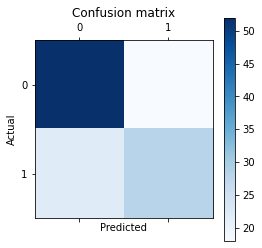

In [159]:
plt.matshow(knncm,  cmap = plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

__Compute average accuracy scores for decision tree classifier on training and test data:__

In [160]:
train_accuracy = np.round(tree_classifier.score(train_set, train_target)*100,0)  # use score method to get average accuracy for train data
test_accuracy = np.round(tree_classifier.score(test_set, test_target)*100,0)     # use score method to get average accuracy for test data

print('average accuracy train:', train_accuracy)
print('average accuracy test:', test_accuracy)

average accuracy train: 100.0
average accuracy test: 82.0


Comparing the average accuracy scores on the training and test sets for the decision tree classifier, it appears as though this model may be overfit (learned the training data too well), as the accuracy for the training set is 100%.  Typically, this should not be the case, and the parameters of this classifier should be tuned appropriately to adjust. The average accuracy for the test set is 82%, which is still pretty good, and much better than the above results of the KNN classifier.  

In terms of the bias/variance tradeoff, decision trees tend to have low bias and high variance (although this does depend on tree depth and other parameters).  This means that in general decision tree classifiers make less assumptions about the data, but will be more affected by small changes in the training set.  Looking at the above results, it would probably be beneficial to tune this model to reduce the accuracy in the training set a bit, but hopefully increase the average accuracy in the test set, ideally resulting in a smaller disparity between the training and testing accuracies.   

__Run Gaussian Naive Bayes classifier:__

In [161]:
nb_classifier = naive_bayes.GaussianNB()                     # naive bayes classifer
nb_classifier = nb_classifier.fit(train_set, train_target)   # fitting the training data

__Look at the class predictions:__

In [162]:
pred_test_target = nb_classifier.predict(test_set)  # see which classes are predicted for test set
pred_test_target

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1])

__Look at the naive bayes classification report:__

In [163]:
print(classification_report(test_target, pred_test_target))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        70
           1       0.53      0.46      0.49        50

    accuracy                           0.61       120
   macro avg       0.59      0.59      0.59       120
weighted avg       0.60      0.61      0.60       120



__Generate confusion matrix & visualize results for naive bayes classifier:__

In [164]:
nbcm = confusion_matrix(test_target, pred_test_target)
print(nbcm)

[[50 20]
 [27 23]]


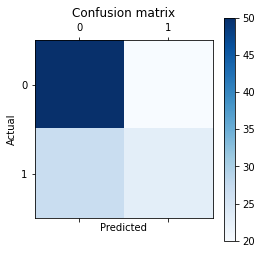

In [165]:
plt.matshow(nbcm,  cmap = plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

__Compute average accuracy scores for naive bayes classifier on training and test data:__

In [166]:
train_accuracy = np.round(nb_classifier.score(train_set, train_target)*100,0)  # use score method to get average accuracy for train data
test_accuracy = np.round(nb_classifier.score(test_set, test_target)*100,0)     # use score method to get average accuracy for test data

print('average accuracy train:', train_accuracy)
print('average accuracy test:', test_accuracy)

average accuracy train: 65.0
average accuracy test: 61.0


Comparing the average accuracy scores on the training and test sets for the naive bayes classifier, the average accuracy for the training set is 65%, and the average accuracy for the test set is 61%.  It appears that this classifier performed worse than both the KNN and decision tree classifiers.

Although the naive bayes classifier was not very accurate, its training and testing accuracy is the closest of all three models, suggesting that it is a high bias/low variance classifier.  This model makes more assumptions about the underlying structure of the data than the previous two models. This trait however appears to be negatively impacting the classifier's ability to correctly predict the right class, as it has the worst average accuracy of all three classifiers attempted.

## 2-D: Discuss observations of the above experiments

Based on the above experiments, it appears that the decision tree classifier was the most accurate model, with an average accuracy of 82% on the test set.  However, this model is most likely overfit (100% accuracy on the training set), and needs to be appropriately tuned.  Additionally, since the decision tree classifier is a low bias/high variance model, small changes in the training set will likely result in larger variations in the results than the other two classifiers.  The KNN classifier displayed the second highest amount of variance between its average accuracies in the training versus the test set, and also had the second highest average accuracy (68% after introducing weighted distances & tuning the value of k). The Naive Bayes classifier on the other hand, suffers from high bias/low variance.  Although its training and test accuracies were the closest of the three models, its average test accuracy was not very good (only 61%).  For this data set, it seems that using a decision tree classifer with appropriately tuned parameters would be the best choice.     